# Usage (quickest version)

## Preparation

In [1]:
# Standard users
# !pip install covsirphy

In [2]:
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [3]:
from pprint import pprint

In [4]:
import covsirphy as cs
cs.__version__

'2.9.0'

## Dataset preparation
Download the datasets to "input" directory and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [5]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)

Note:  
Datasets were retrieved via [COVID-19 Data Hub](https://covid19datahub.io/https://covid19datahub.io/) and the citation is  
Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.

Scenario analysis can be performed for the following countries.

In [6]:
pprint(set(jhu_data.countries()) & set(population_data.countries()), compact=True)

{'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria',
 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
 'Congo', 'Costa Atlantica', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia',
 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 

## Start scenario analysis
As an example, we will analysis the number of cases in Italy.

In [7]:
snl = cs.Scenario(jhu_data, population_data, country="Italy")

## Check records

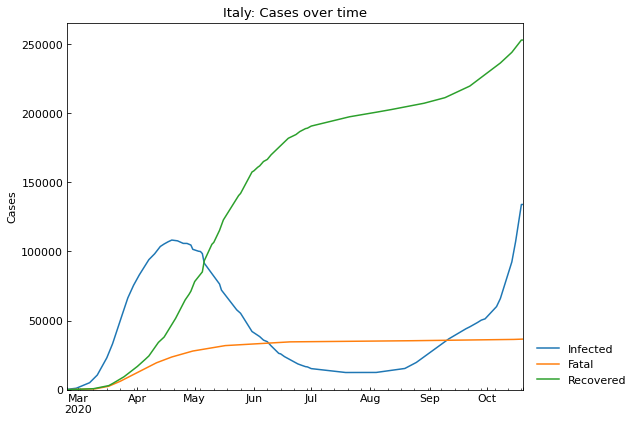

In [8]:
_ = snl.records()

## S-R trend analysis
S-R trend analysis finds the change points of SIR-derived ODE parameters.

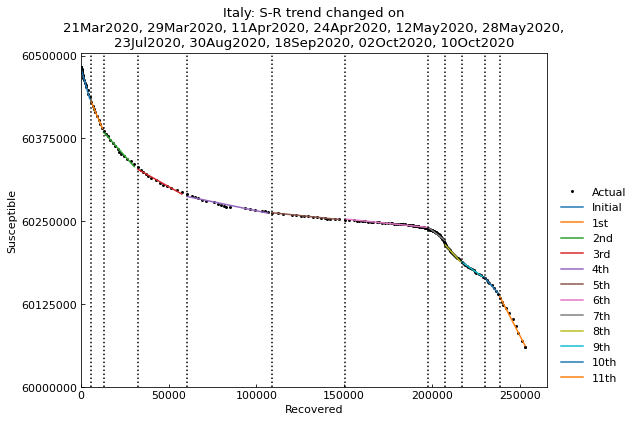

In [9]:
_ = snl.trend()

In [10]:
snl.summary()

,Type,Start,End,Population
0th,Past,24Feb2020,20Mar2020,60483973
1st,Past,21Mar2020,28Mar2020,60483973
2nd,Past,29Mar2020,10Apr2020,60483973
3rd,Past,11Apr2020,23Apr2020,60483973
4th,Past,24Apr2020,11May2020,60483973
5th,Past,12May2020,27May2020,60483973
6th,Past,28May2020,22Jul2020,60483973
7th,Past,23Jul2020,29Aug2020,60483973
8th,Past,30Aug2020,17Sep2020,60483973
9th,Past,18Sep2020,01Oct2020,60483973


## Hyperparameter estimation of ODE models
As an example, use SIR-F model.

In [11]:
snl.estimate(cs.SIRF)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	11th phase (10Oct2020 - 20Oct2020): finished 1064 trials in 0 min 35 sec


	 1st phase (21Mar2020 - 28Mar2020): finished 1554 trials in 1 min  0 sec

	 0th phase (24Feb2020 - 20Mar2020): finished 1529 trials in 1 min  0 sec

	 2nd phase (29Mar2020 - 10Apr2020): finished 1541 trials in 1 min  0 sec

	 3rd phase (11Apr2020 - 23Apr2020): finished 1548 trials in 1 min  0 sec

	 5th phase (12May2020 - 27May2020): finished  328 trials in 0 min 10 sec

	 6th phase (28May2020 - 22Jul2020): finished  570 trials in 0 min 20 sec

	 9th phase (18Sep2020 - 01Oct2020): finished  321 trials in 0 min 10 sec

	 4th phase (24Apr2020 - 11May2020): finished 1509 trials in 1 min  0 sec

	 7th phase (23Jul2020 - 29Aug2020): finished 1515 trials in 1 min  0 sec

	 8th phase (30Aug2020 - 17Sep2020): finished 1581 trials in 1 min  0 sec

	10th phase (02Oct2020 - 09Oct2020): finished 1723 trials in 1 min  0 sec

Completed optimization. Total: 3 min  7 sec


## History of reproduction number

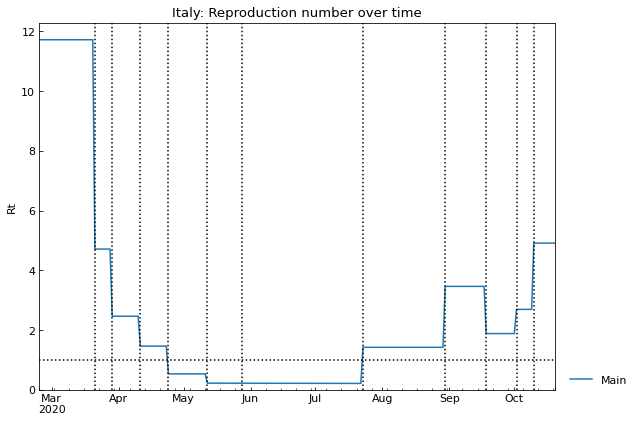

In [12]:
_ = snl.history(target="Rt")

## History of parameters

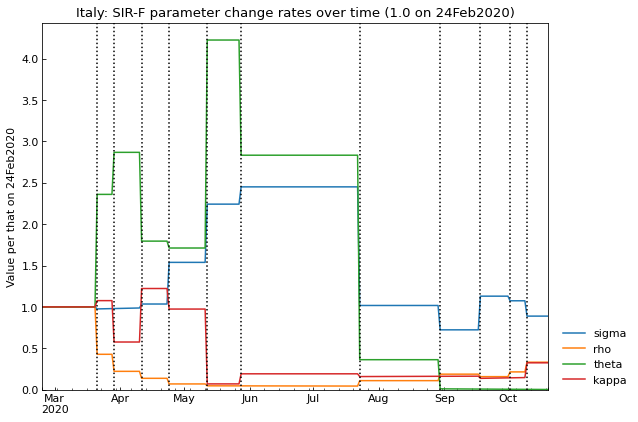

In [13]:
_ = snl.history_rate()

## Simulate the number of cases

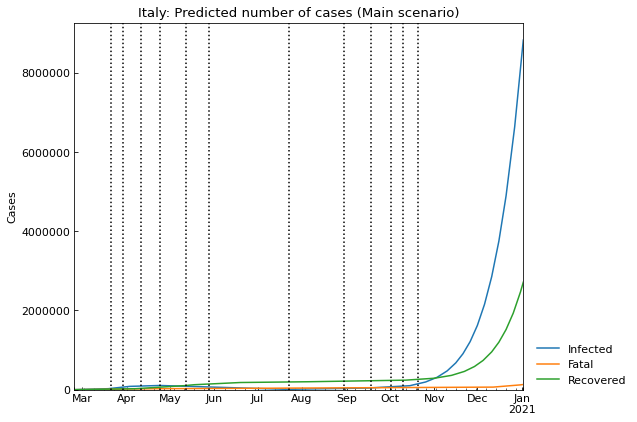

In [14]:
snl.add(end_date="01Jan2021")
_ = snl.simulate()